In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
import PIPPET
import utils

## Plotting Functions (_scroll down for examples_)

In [3]:
%matplotlib inline

plt.style.use('default')
  
DPI = 600
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = DPI
plt.rcParams['figure.autolayout'] = False
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 8
sns.set_context('paper', font_scale=0.9)

In [4]:
def merge_legends(axs):
    # Consolidated legend
    def _by_label(a):
        handles, labels = a.get_legend_handles_labels()
        return dict(zip(labels, handles))
    by_label = dict()
    for ax in axs:
        by_label.update(_by_label(ax))
    return by_label

def plot_template(model, ax_temp, cols):
    # Expectations
    ts, temps = utils.template(model)
    for i, temp in enumerate(temps):
        ax_temp.plot(temp, ts, c=cols[i], label=model.labels[i])
    ax_temp.set_xlabel('Expectation λ(Φ)')
    ax_temp.set_ylabel('Phase Φ')
    
def plot_phase(model, ax, col):
    # Phase progress
    std = 2*np.sqrt(model.V_s)
    ax.plot(model.ts, model.mu_s, c=col, linewidth=1.75, label='Est. phase, '+r'$\mu_t$')
    ax.fill_between(model.ts, model.mu_s-std, model.mu_s+std, alpha=0.2, facecolor=col, label='Est. var., '+r'$4\sqrt{V_t}$')
    ax.set_xlabel('Time')
    
def plot_events(model, ax, ax_temp, ax_prob=None):
    # Stimulus/Auditory events
    for i in set(model.idx_event):
        ax.axvline(model.ts[i], color='black', alpha=0.55, linestyle='--', linewidth=1, label='Auditory event')
        if ax_prob:
            ax_prob.axvline(model.ts[i], color='black', alpha=0.55, linestyle='-', linewidth=1, label='Auditory event')
    # Expected events
    for stream in model.streams:
        for e_m in stream.params.e_means:
            ax.axhline(e_m, color='grey', alpha=0.55, linestyle='--', linewidth=1, label='Event expectation')
            ax_temp.axhline(e_m, color='grey', alpha=0.55, linestyle='--', linewidth=1, label='Event expectation')

def plot_mPIPPET(model, wippet=False):
    cs = sns.color_palette('husl', 1+model.n_streams)

    # Create the grid
    fig = plt.figure(figsize=(6, 3))
    gs = fig.add_gridspec(1, 2,  width_ratios=(1, 4))
    ax = fig.add_subplot(gs[0, 1])
    ax_temp = fig.add_subplot(gs[0, 0], sharey=ax)

    plot_phase(model, ax, cs[0])
    plot_template(model, ax_temp, cs[1:])
    plot_events(model, ax, ax_temp)

    ax.set_xlim([m.params.t0, m.tmax])
    
    if wippet:
        ax.set_ylim([-np.pi, np.pi])
        ax.axhline(0.0, color='blue', alpha=0.55, linestyle='--', linewidth=1)
        ax_temp.axhline(0.0, color='blue', alpha=0.55, linestyle='--', linewidth=1)
        ax.axhline(-np.pi/2, color='blue', alpha=0.55, linestyle='--', linewidth=1)
        ax.axhline(np.pi/2, color='blue', alpha=0.55, linestyle='--', linewidth=1)
        ax_temp.axhline(-np.pi/2, color='blue', alpha=0.55, linestyle='--', linewidth=1)
        ax_temp.axhline(np.pi/2, color='blue', alpha=0.55, linestyle='--', linewidth=1)
    else:
        ax.set_ylim([m.params.t0, m.tmax])

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax_temp.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax_temp.tick_params(axis='both', which='major', labelsize=8)
    
    legend = merge_legends([ax, ax_temp])
    fig.legend(legend.values(), legend.keys(), loc='upper center', bbox_to_anchor=(0.85, 0.4),
               prop={'size':6}, ncol=2, fancybox=False, framealpha=1, edgecolor='black')
    
    plt.tight_layout()
    
def plot_pPIPPET(model):
    cs = sns.color_palette('husl', 1+model.n_streams)

    # Create the grid
    fig = plt.figure(figsize=(6, 4))
    gs = fig.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 5), wspace=0.05, hspace=0.05)
    ax = fig.add_subplot(gs[1, 1])
    ax_prob = fig.add_subplot(gs[0, 1], sharex=ax)
    ax_temp = fig.add_subplot(gs[1, 0], sharey=ax)

    plot_phase(model, ax, cs[0])
    plot_template(model, ax_temp, cs[1:])
    plot_events(model, ax, ax_temp, ax_prob)
    
    # Probabilities
    for s_i in range(model.n_streams):
        ax_prob.plot(model.ts, model.p_m[:, s_i], c=cs[1+s_i], label=model.labels[s_i])
    ax_prob.set_ylabel('Probability', fontsize=8)
    
    ax.set_xlim([m.params.t0, m.tmax])
    ax.set_ylim([m.params.t0, m.tmax])
    ax_prob.set_ylim([0.0, 1.0])

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax_prob.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax_temp.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax_prob.get_xticklabels(), visible=False)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax_prob.tick_params(axis='both', which='major', labelsize=8)
    ax_temp.tick_params(axis='both', which='major', labelsize=8)
    
    legend = merge_legends([ax, ax_temp, ax_prob])
    fig.legend(legend.values(), legend.keys(), loc='upper center', bbox_to_anchor=(0.7, 0.3), 
               prop={'size':6}, ncol=2, fancybox=False, framealpha=1, edgecolor='black')

# PIPPET

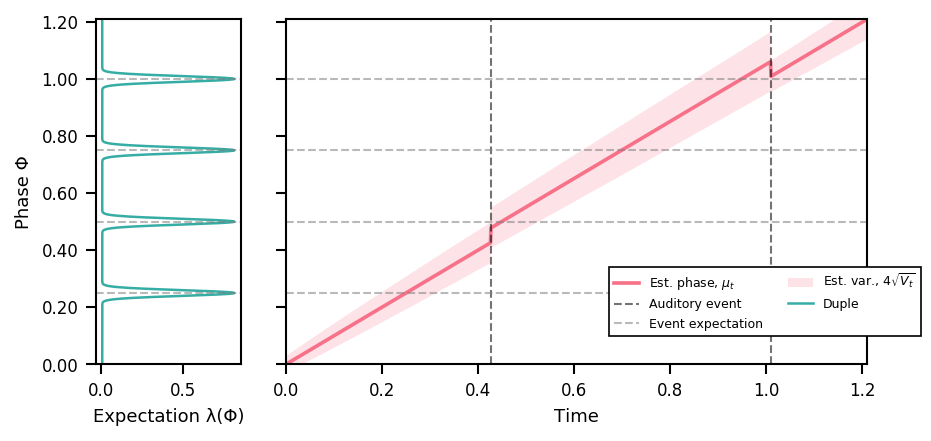

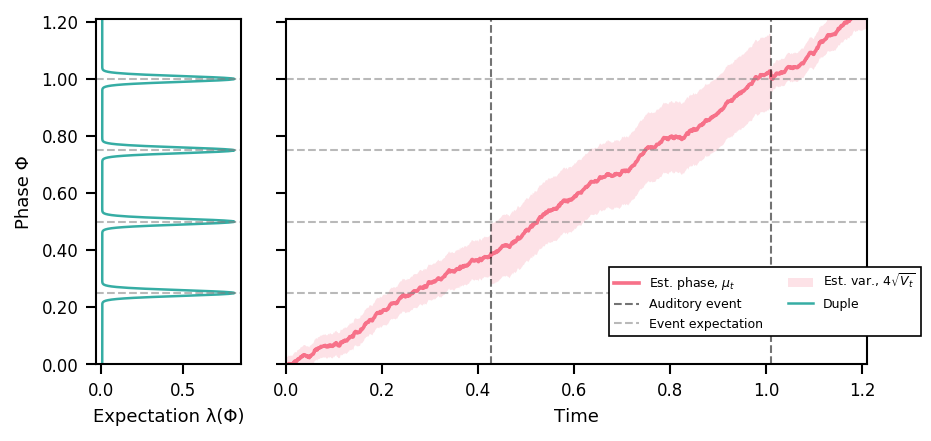

In [5]:
p = PIPPET.PIPPETParams()
p.overtime = 0.2
e_times   = np.array([0.5, 1.0]) + np.random.default_rng().normal(size=2)*.05
e_means   = np.array([0.25, 0.5, 0.75, 1.0])
e_vars    = np.array([0.0001]).repeat(len(e_means))
e_lambdas = np.array([0.02]).repeat(len(e_means))
p.add(e_times, e_means, e_vars, e_lambdas, 'Duple')

m = PIPPET.mPIPPET(p)
m.run()
plot_mPIPPET(m)

# Add some noise this time
p.eta_mu = 0.075
m = PIPPET.mPIPPET(p)
m.run()
plot_mPIPPET(m)

# mPIPPET

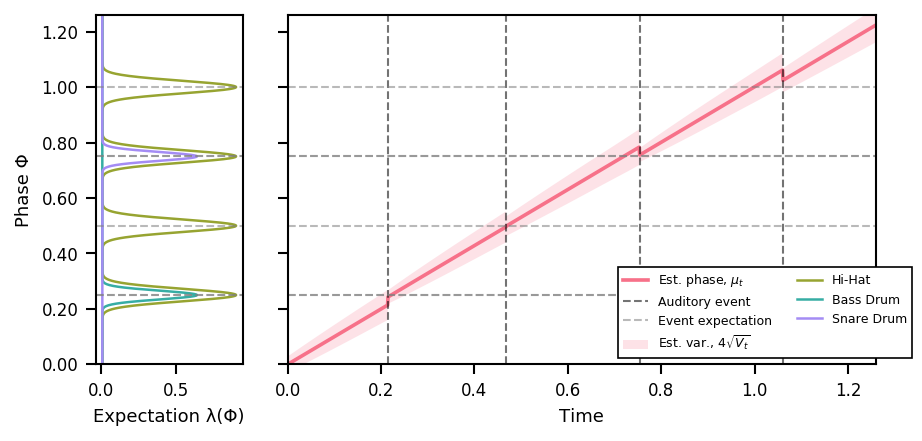

In [6]:
p = PIPPET.PIPPETParams()
p.overtime = 0.2
e_times   = np.array([0.25, 0.5, 0.75, 1.0]) + np.random.default_rng().normal(size=4)*.05
e_means   = np.array([0.25, 0.5, 0.75, 1.0])
e_vars    = np.array([0.0005]).repeat(len(e_means))
e_lambdas = np.array([0.05]).repeat(len(e_means))
p.add(e_times, e_means, e_vars, e_lambdas, 'Hi-Hat')
e_vars    = np.array([0.00025])
e_lambdas = np.array([0.025])
p.add(e_times, np.array([0.25]), e_vars, e_lambdas, 'Bass Drum')
p.add(e_times, np.array([0.75]), e_vars, e_lambdas, 'Snare Drum')
m = PIPPET.mPIPPET(p)
m.run()
plot_mPIPPET(m)

# pPIPPET

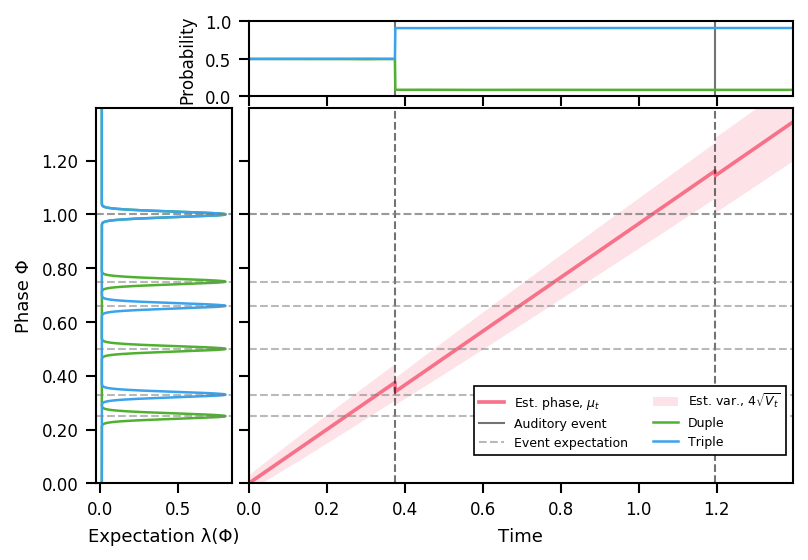

In [7]:
p = PIPPET.PIPPETParams()
p.overtime = 0.2
e_times   = np.array([0.5, 1.0]) + np.random.default_rng().normal(size=2)*.075
e_means   = np.array([0.25, 0.5, 0.75, 1.0])
e_vars    = np.array([0.0001]).repeat(len(e_means))
e_lambdas = np.array([0.02]).repeat(len(e_means))
p.add(e_times, e_means, e_vars, e_lambdas, 'Duple')
e_means   = np.array([0.33, 0.66, 1.0])
e_vars    = np.array([0.0001]).repeat(len(e_means))
e_lambdas = np.array([0.02]).repeat(len(e_means))
p.add(e_times, e_means, e_vars, e_lambdas, 'Triple')

m = PIPPET.pPIPPET(p, prior=[0.5, 0.5])
m.run()
plot_pPIPPET(m)

# WIPPET

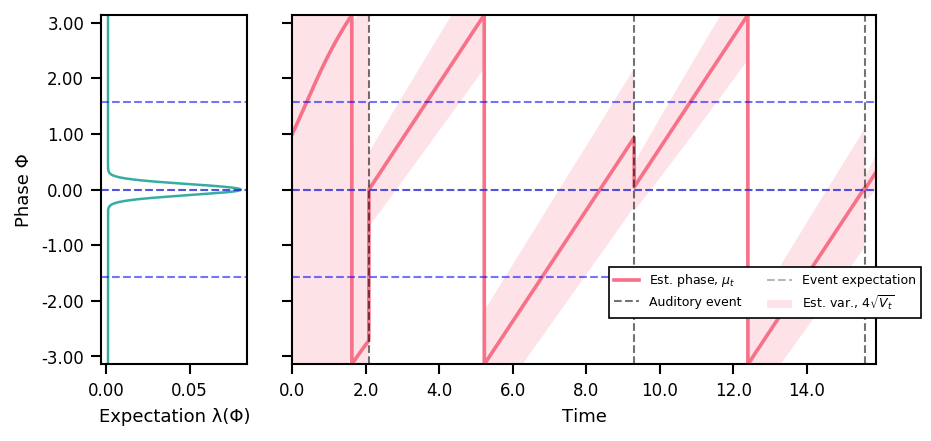

In [8]:
p = PIPPET.PIPPETParams()
p.dt = 0.002
p.overtime = np.pi/10.
p.sigma_phi = 0.2
p.mu_0 = 1
p.V_0 = 10.0
p.lambda_0 = 0.001
e_times   = np.array([np.pi, 3*np.pi -.3, 5*np.pi]) + np.random.default_rng().normal(size=3)*.75
e_means   = np.array([0])
e_vars    = np.array([0.01]).repeat(len(e_means))
e_lambdas = np.array([0.02]).repeat(len(e_means))
p.add(e_times, e_means, e_vars, e_lambdas, '')

m = PIPPET.WIPPET(p)
m.run()
plot_mPIPPET(m, wippet=True)